<a href="https://colab.research.google.com/github/aryamanak10/Introduction-to-Machine-Learning-Book-Codes/blob/master/Chapter%203%20-%20Unsupervised%20Learning%20and%20Preprocessing/EigenFaces_for_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

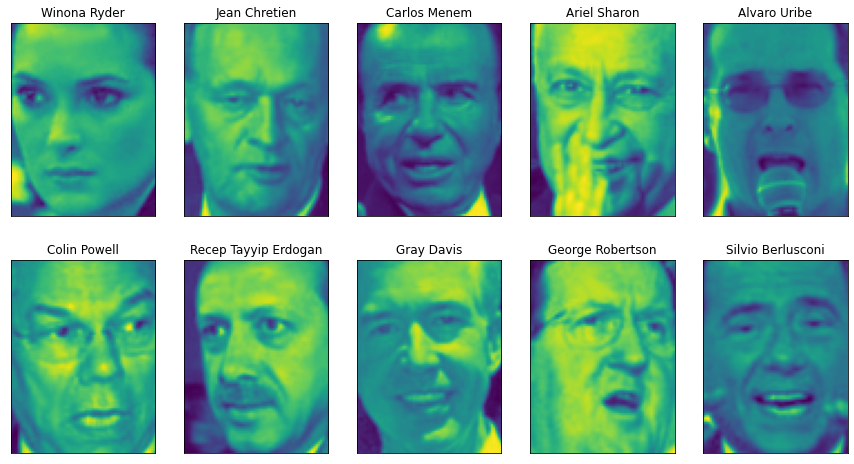

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (),  'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [ ]:
print("People.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

People.images.shape: (3023, 87, 65)
Number of classes: 62


In [ ]:
# Counting how often each target appears

import numpy as np
counts = np.bincount(people.target)

# Printing count next to the target names

for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end = " ")
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

As you can see the dataset is skewed because it has many pictures of George W. Bush and Colin Powell so to remove this skewness we will only take up to 50 images of each person. 

Other wise the feature extraction will be overwhelmed with the images of George W. Bush

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# Scaling the Greyscale Values to be between 0 and 1 instead of 0 and 255 for better numeric capability
X_people = X_people / 255

### K - Nearest Neigbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# Building the KNeighborsClassifier using 1 neighbor

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


As you can see our test set accuracy is less than 25% which is great if we had guessed it randomly we would have got 1.5% (1/62) accuracy but it is not so great as well.

Therefore we use PCA. 

In [ ]:
!pip install mglearn

In [ ]:
import mglearn

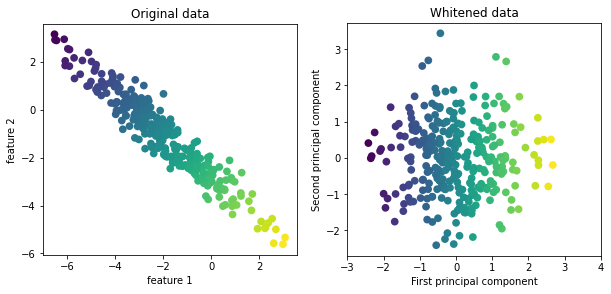

In [ ]:
mglearn.plots.plot_pca_whitening()

In [ ]:
# We fit the PCA object on the training data and extract the first 100 principal components. Then we transform the training and testing data.

from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca shape: {}".format(X_train_pca.shape))

X_train_pca shape: (1547, 100)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [ ]:
print("PCA Component's Shape: {}".format(pca.components_.shape))

PCA Component's Shape: (100, 5655)


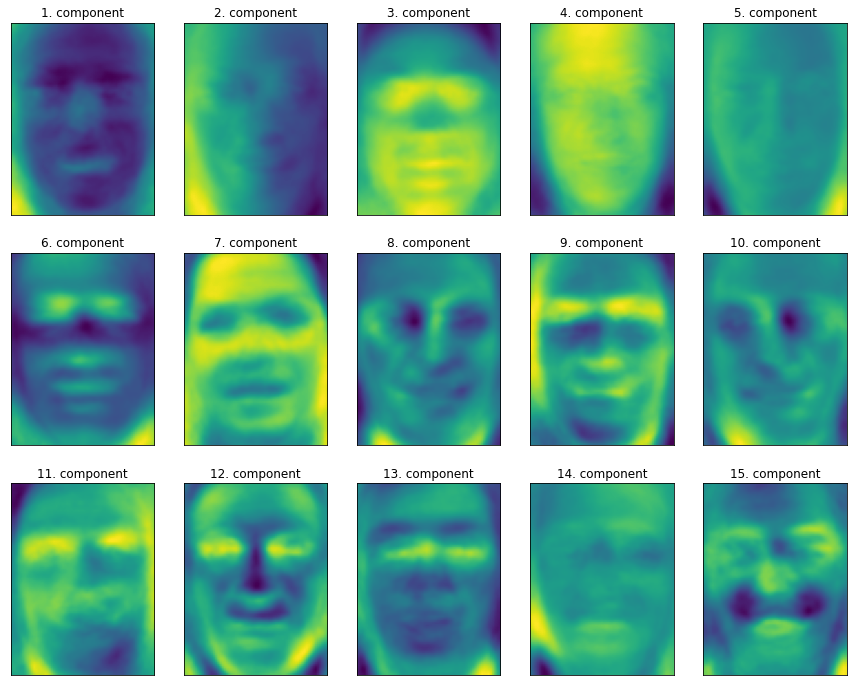

In [ ]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("{}. component".format((i + 1)))

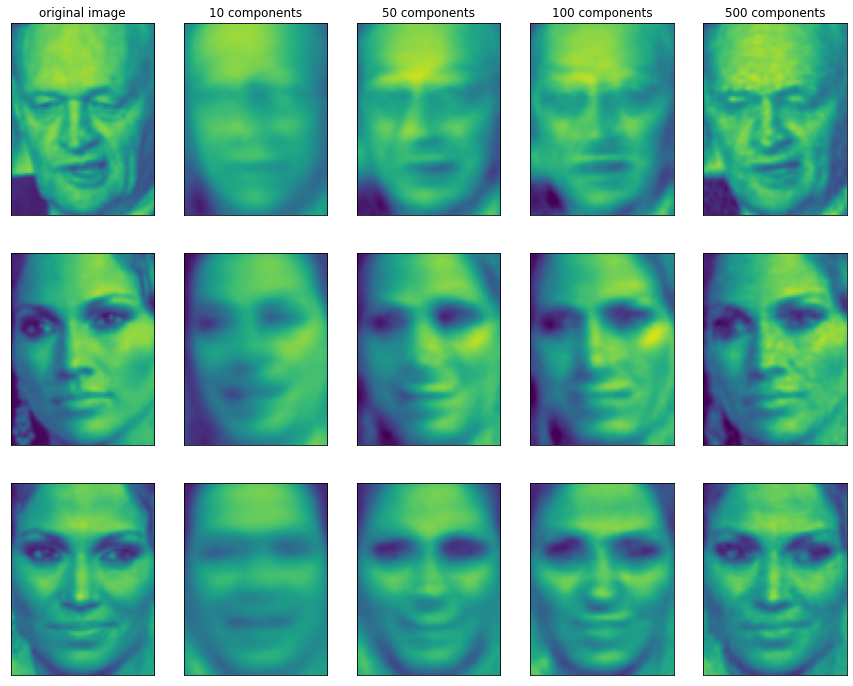

In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second Principal Component')

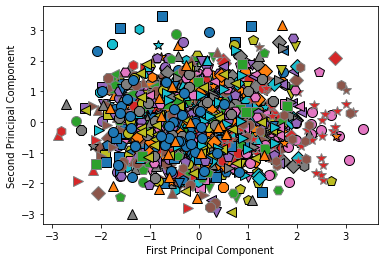

In [ ]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

## Non-Negative Matrix Factorization (NMF)

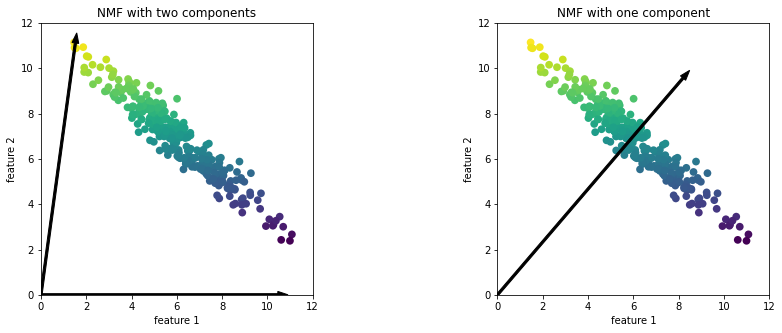

In [ ]:
mglearn.plots.plot_nmf_illustration()

### Applying NMF to face images

In [ ]:
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

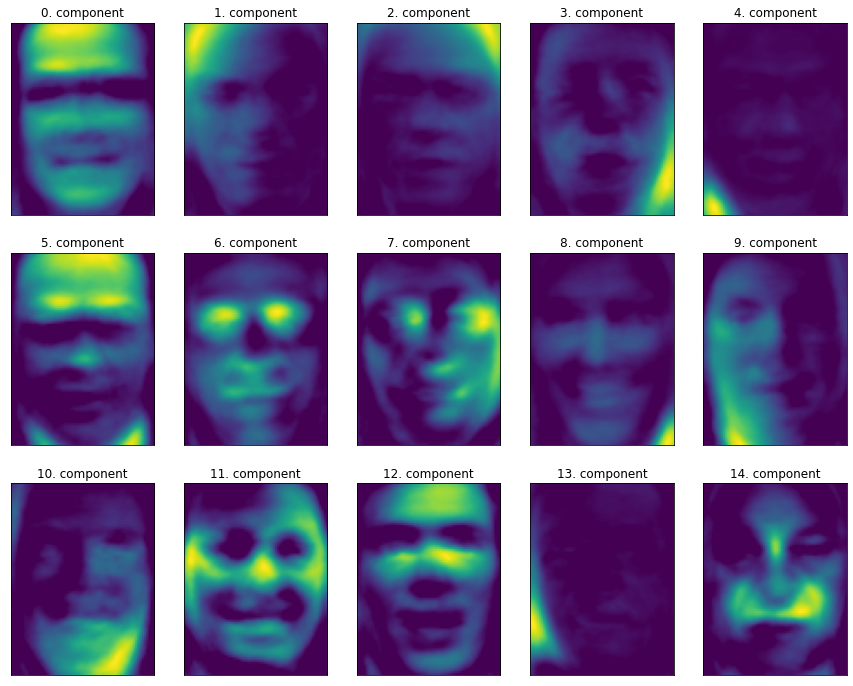

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title("{}. component".format(i))

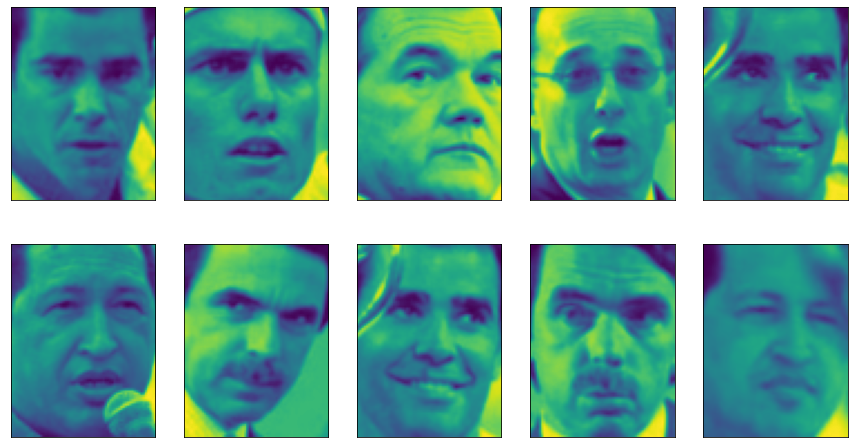

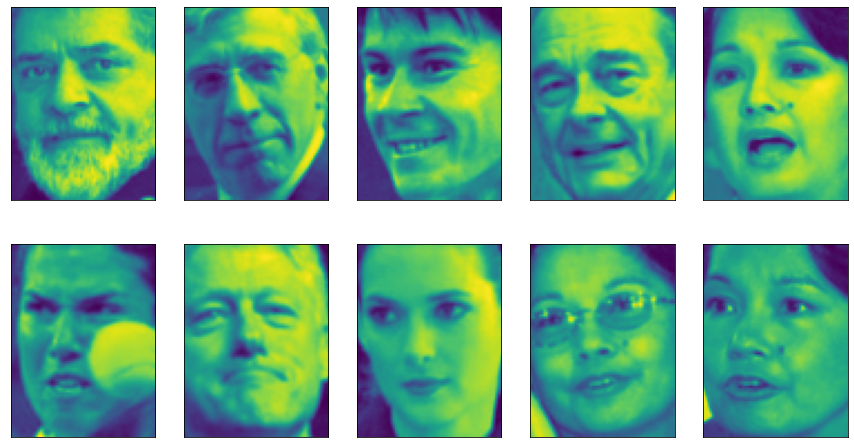

In [ ]:
# Sort by 3rd Component, Plotting first 10 images
compn = 3

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

# Sort by 7th Component, Plotting first 10 images
compn = 7

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

As you can see that faces with high coefficient for component 3 are faces looking to the right while faces with high coefficient for component 7 are faces looking to the left.

Therefore we extracted a pattern using NMF. The data need to be of an additive structure.

Text(0, 0.5, 'Signal')

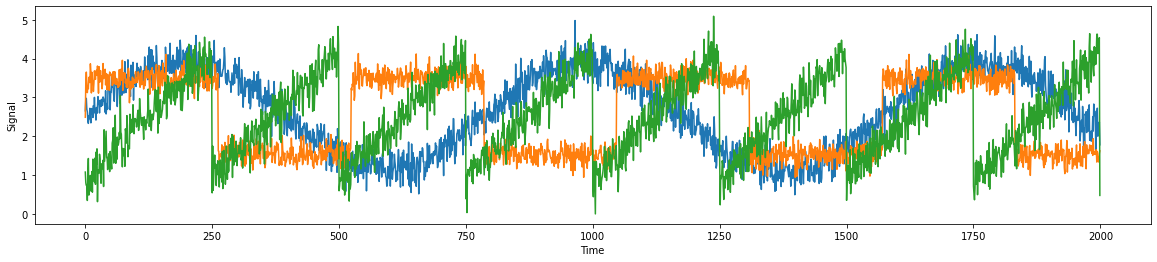

In [ ]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(20, 4))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [ ]:
# Mixing this data into a 100 dimensional state

A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of components: {}".format(X.shape))

Shape of components: (2000, 100)


In [ ]:
# Using NMF to recover the three signals

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [ ]:
# We also apply PCA for comparision

pca = PCA(n_components=3)
H = pca.fit_transform(X)

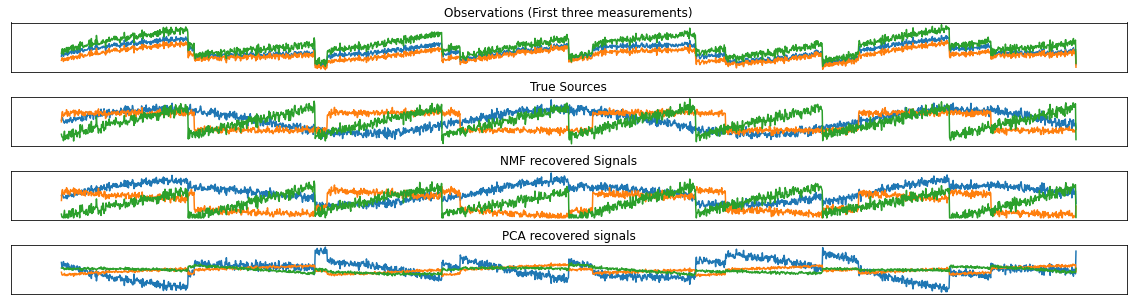

In [ ]:
models = [X, S, S_, H]
names = ['Observations (First three measurements)',
         'True Sources',
         'NMF recovered Signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(20, 5), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
  ax.set_title(name)
  ax.plot(model[:, :3], '-')

### Vector Quantization, or seeing K-Means as decomposition

Text(0, 0.5, 'NMF')

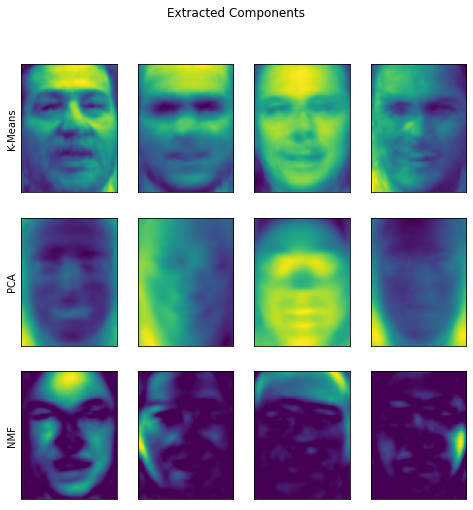

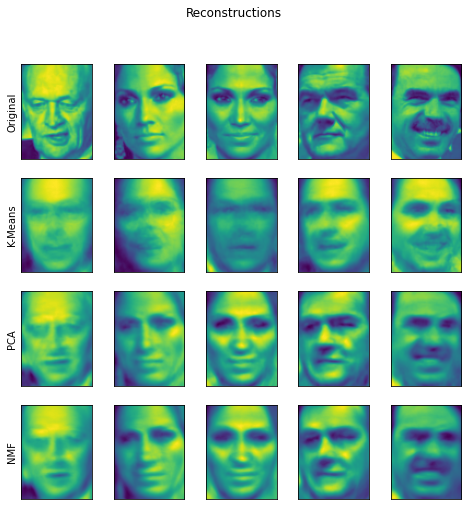

In [ ]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_people)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_people)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_people)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = nmf.inverse_transform(nmf.transform(X_test))

fig, axes = plt.subplots(3, 4, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
  ax[0].imshow(comp_kmeans.reshape(image_shape))
  ax[1].imshow(comp_pca.reshape(image_shape))
  ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0,0].set_ylabel("K-Means")
axes[1,0].set_ylabel("PCA")
axes[2,0].set_ylabel("NMF")

fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
  ax[0].imshow(orig.reshape(image_shape))
  ax[1].imshow(rec_kmeans.reshape(image_shape))
  ax[2].imshow(rec_pca.reshape(image_shape))
  ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0,0].set_ylabel("Original")
axes[1,0].set_ylabel("K-Means")
axes[2,0].set_ylabel("PCA")
axes[3,0].set_ylabel("NMF")

Clusters memeberships:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


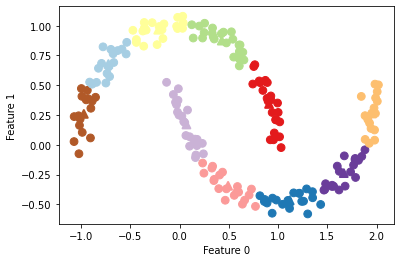

In [ ]:
# Vectorization using K - Means for the 2- Moons dataset

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s = 60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Clusters memeberships:\n{}".format(y_pred))

In [ ]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


In [ ]:
# MiniBatchKMeans is used for larger datasets and is the scalable variant of the K-Means.

# Downside of the K-Means is that it relies of the random intialization. It runs the algorithm 10 times with 10 different random intializations and return the
# best results.

# It is also restricitve on the shape of the clusters which as seen in the Moons datasets does not work properly and also the requirement to specify the number
# of clusters which you might not know in the real-world application

### Comparing Clustering Algorithms on the Faces Dataset

In [ ]:
# Extracting EigenFaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

#### Analyzing the faces dataset with DBSCAN

In [ ]:
# Applying DBSCAN with default parameters
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [ ]:
# To avoid this problem of having each data point as a noise, we can either increase 'eps' or decrease the 'min_samples'

# Chaning min_samples
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [ ]:
# Now incresing eps as we did not see a change in the result

dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [ ]:
# Counting number of points in all clusters and noise
# Bincount function does not allow negative numbers, so we need to add 1.
# The first number in the result corresponds to the noise points.

print("Number of points per cluster: {}".format(np.bincount(labels+1)))

Number of points per cluster: [  32 2031]


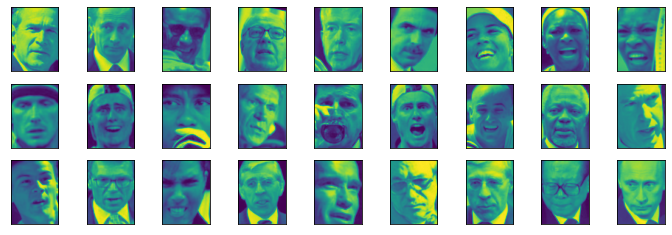

In [ ]:
# Few number of noise points so we can look at them.

noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
# Such kind of analysis - trying to find "the odd one out" - is called 'outlier detection'. These are the kind of issues that each
# algorithm needs to handle.

In [ ]:
# For finding more interesting clusters than just one large one, we need to set eps smaller somewhere between 15 and 0.5(default value)


for eps in [1, 3, 5, 7, 9, 11, 13]:
  print("\neps={}".format(eps))
  dbscan = DBSCAN(eps=eps, min_samples=3)
  labels = dbscan.fit_predict(X_pca)
  print("Cluster present: {}".format(np.unique(labels)))
  print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Cluster present: [-1]
Cluster sizes: [2063]

eps=3
Cluster present: [-1]
Cluster sizes: [2063]

eps=5
Cluster present: [-1]
Cluster sizes: [2063]

eps=7
Cluster present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Cluster present: [-1  0  1  2]
Cluster sizes: [1307  750    3    3]

eps=11
Cluster present: [-1  0]
Cluster sizes: [ 413 1650]

eps=13
Cluster present: [-1  0]
Cluster sizes: [ 120 1943]


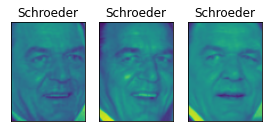

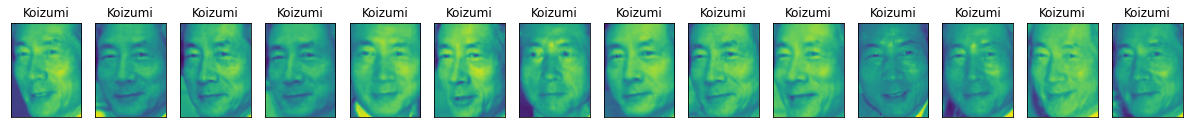

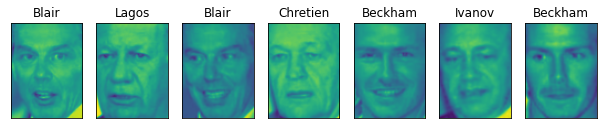

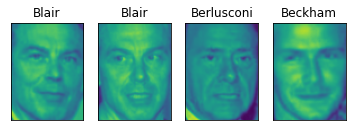

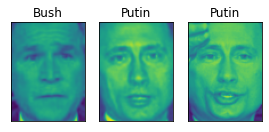

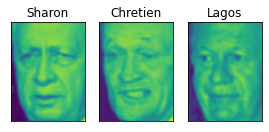

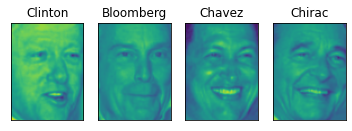

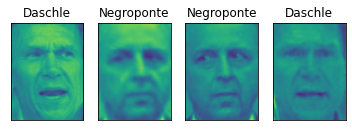

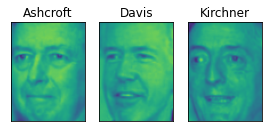

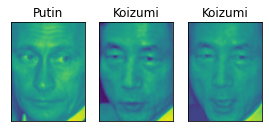

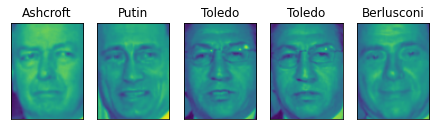

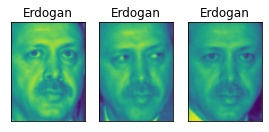

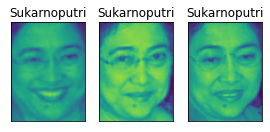

In [ ]:
# Since eps=7 produced an interesting result we will try to explore it more. It gave us a lot of noises and many smaller clusters.

dbscan = DBSCAN(eps=7, min_samples=3)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
  mask = labels == cluster
  n_images = np.sum(mask)
  fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})

  for image, label, ax in zip(X_people[mask], y_people[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1])

#### Analyzing the faces dataset with K-Means

In [ ]:
# In this method, we need to set the number of clusters. Intially we set it as 10 which is a low value. We could also set the number of
# clusters equal to the number of faces but as it is an unsupervised learning algorithm it would be difficult to find all the faces.

# Extracting the clusters with K-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster size K-Means: {}".format(np.bincount(labels_km)))

Cluster size K-Means: [282 226 105 268 151 324 202 208 208  89]


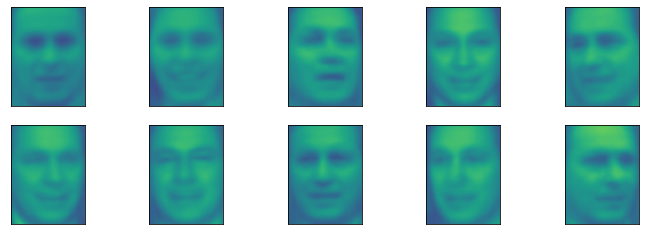

In [ ]:
# These results are different from that of DBSCAN. K-Means partitioned the data into relatively similarly sized clusters.
# Now we will visualize the cluster centers by using pca.inverse_transform method.

fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
  ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

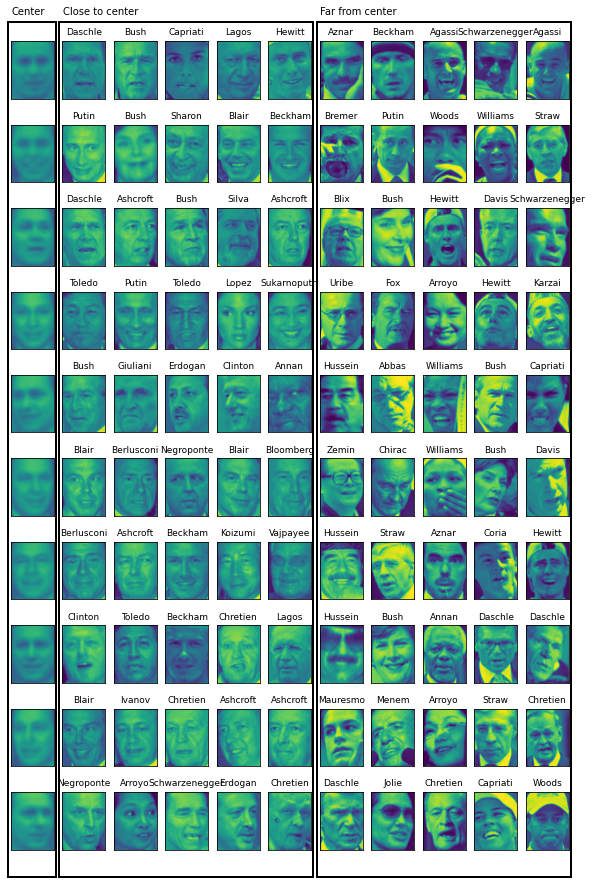

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [ ]:
# K-Means does not have a sense of 'noise' as DBSCAN does hence it clusters each and every data point to a cluster centre effectively.

#### Analyzing the faces dataset with agglomerative clustering

In [ ]:
# Extracting clusters with ward agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=10)
labels_agg = agg.fit_predict(X_pca)
print("Cluster sizes with agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes with agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


These cluster sizes are move even than DBSCAN but more uneven than K-Means. But they also produce relatively equally sized clusters

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.10


In [ ]:
# Since the ARI is only 0.10 this means the labels of K-Means and Agglomerative have very little in common. This is not very surprising
# as points further away from cluster centres seem to have little in common for K-Means.

#### Plotting the Dendrogram

Text(0, 0.5, 'Cluster Distance')

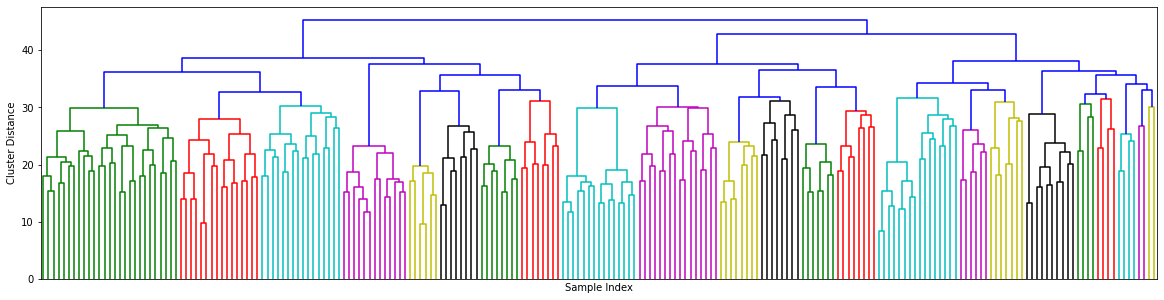

In [ ]:
# We will limit the depth of the tree in the plot as brancing down to 2063 data points would result in an unreadably dense plot.
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_pca)

# Now we plot the dendrogram for the linkage array containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")

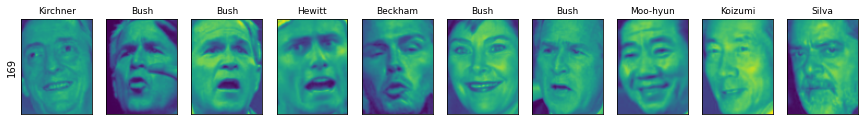

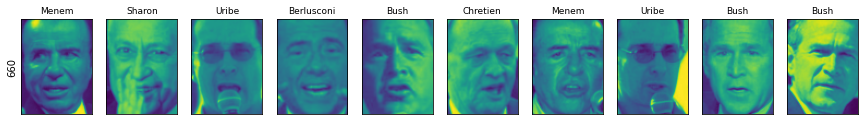

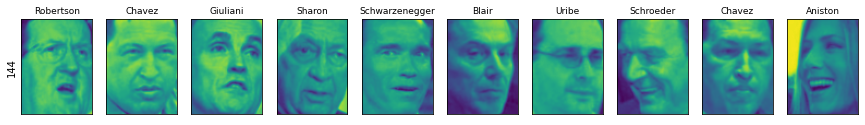

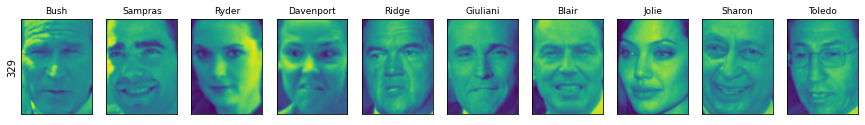

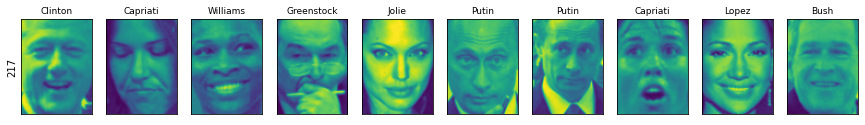

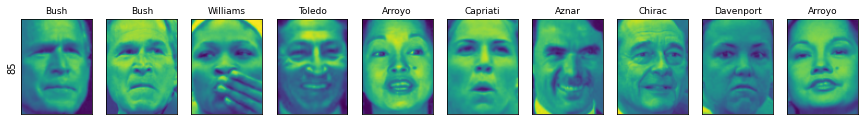

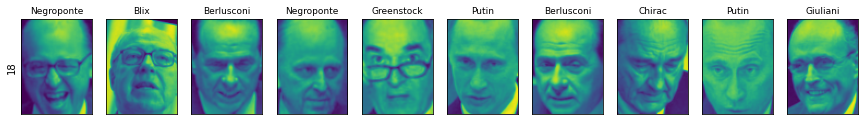

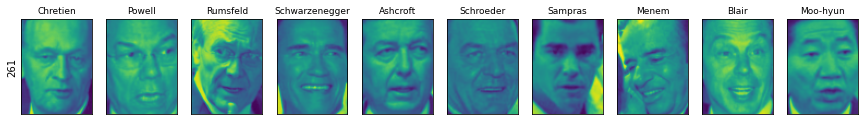

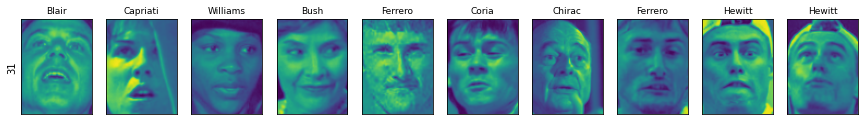

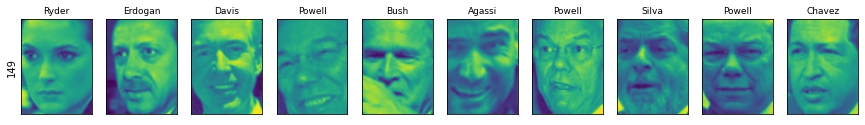

In [ ]:
# 10 clusters

n_clusters = 10
for cluster in range(n_clusters):
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
  axes[0].set_ylabel(np.sum(mask))
  for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

In [ ]:
# 40 clusters

# Extracting clusters with ward agglomerative clustering
agg = AgglomerativeClustering(n_clusters=40)
labels_agg = agg.fit_predict(X_pca)
print("Cluster sizes with agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes with agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


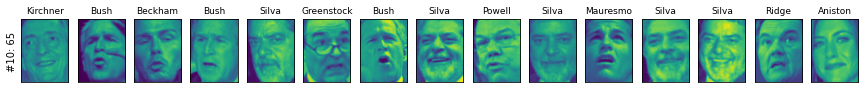

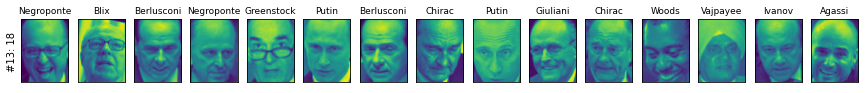

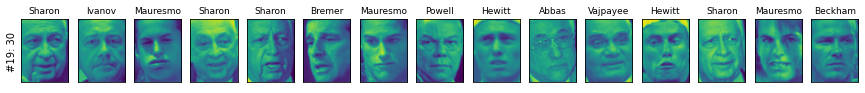

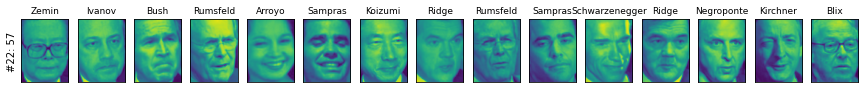

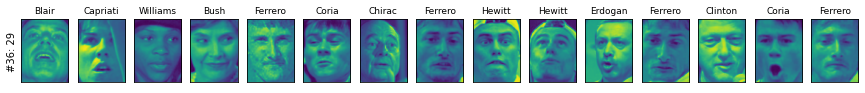

In [ ]:
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]:
  # Hand-Picked "Interesting" Clusters
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
  cluster_size = np.sum(mask)
  axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
  for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
  
  for i in range(cluster_size, 15):
    axes[i].set_visible(False)